<a href="https://colab.research.google.com/github/NIMAICHAITANYA/TASK4-SPAM-EMAIL-DETECTION/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
from google.colab import drive
import nltk
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import seaborn as sea
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [4]:
data_set=pd.read_csv("spam.csv",encoding='latin-1')

In [5]:
data_set

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
#First 5 rows in the data set
data_set.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
# Print random 10 rows
print("Random 10 rows")
print(data_set.sample(10))

Random 10 rows
        v1                                                 v2 Unnamed: 2  \
155    ham                       Aaooooright are you at work?        NaN   
3956   ham                  Where is that one day training:-)        NaN   
211    ham                         Home so we can always chat        NaN   
4412   ham  Sad story of a Man - Last week was my b'day. M...        NaN   
3390   ham                 I'm in a meeting, call me later at        NaN   
2679  spam  New Tones This week include: 1)McFly-All Ab..,...        NaN   
4246  spam  Text PASS to 69669 to collect your polyphonic ...        NaN   
2420   ham  Oic... Then better quickly go bathe n settle d...        NaN   
2426  spam  Valentines Day Special! Win over å£1000 in our...        NaN   
2648   ham  Hi, can i please get a  &lt;#&gt;  dollar loan...        NaN   

     Unnamed: 3 Unnamed: 4  
155         NaN        NaN  
3956        NaN        NaN  
211         NaN        NaN  
4412        NaN        NaN  
339

In [8]:
# Print total number of rows and columns in dataset
print("Total rows and columns in dataset")
print(data_set.shape)

Total rows and columns in dataset
(5572, 5)


In [9]:
# Print number of rows and columns in dataset separately
print("Total Rows =", data_set.shape[0])
print("Total Columns =", data_set.shape[1])

Total Rows = 5572
Total Columns = 5


In [ ]:
# Print column names
print("Columns in dataset")
print(data_set.columns)

In [10]:
#Renaming columns for better understanding
print("Renaming columns")
data_set.rename(columns={'v1': 'Variety', 'v2': 'Data'}, inplace=True)
print(data_set.head())

Renaming columns
  Variety                                               Data Unnamed: 2  \
0     ham  Go until jurong point, crazy.. Available only ...        NaN   
1     ham                      Ok lar... Joking wif u oni...        NaN   
2    spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3     ham  U dun say so early hor... U c already then say...        NaN   
4     ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [11]:
#Encode the target variable 'Variety'
print("Encoding target variable")
encoder = LabelEncoder()
data_set['Variety'] = encoder.fit_transform(data_set['Variety']) #allotting 0,1
print(data_set.head())

Encoding target variable
   Variety                                               Data Unnamed: 2  \
0        0  Go until jurong point, crazy.. Available only ...        NaN   
1        0                      Ok lar... Joking wif u oni...        NaN   
2        1  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3        0  U dun say so early hor... U c already then say...        NaN   
4        0  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [12]:
#Check information of dataset
print("Dataset information")
print(data_set.info())

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Variety     5572 non-null   int64 
 1   Data        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB
None


In [13]:
#Drop unnecessary columns
print("Dropping extra columns")
data_set.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
print(data_set.head())

Dropping extra columns
   Variety                                               Data
0        0  Go until jurong point, crazy.. Available only ...
1        0                      Ok lar... Joking wif u oni...
2        1  Free entry in 2 a wkly comp to win FA Cup fina...
3        0  U dun say so early hor... U c already then say...
4        0  Nah I don't think he goes to usf, he lives aro...


In [14]:
#Check for duplicate values
print("Checking for duplicate data")
print("Total Duplicated values =", data_set.duplicated().sum())


Checking for duplicate data
Total Duplicated values = 403


In [15]:
#Remove duplicate values
data_set = data_set.drop_duplicates(keep='first')

In [16]:
#Check for null values
print("Checking for null values")
print("Total NULL values =\n\n",data_set.isnull().sum())


Checking for null values
Total NULL values =

 Variety    0
Data       0
dtype: int64


In [17]:
#Print size of dataset
print("Size of dataset is:", data_set.size)

Size of dataset is: 10338


In [18]:
#Print random 6 rows after data cleaning
print("After DATA CLEANING")
print("Total Rows:", data_set.shape[0], "\nTotal columns:", data_set.shape[1])
print(data_set.sample(6))

After DATA CLEANING
Total Rows: 5169 
Total columns: 2
      Variety                                               Data
663         0        Leave it de:-). Start Prepare for next:-)..
946         1  Ur cash-balance is currently 500 pounds - to m...
4825        0                      Haha, just what I was thinkin
1018        0  Nope watching tv at home... Not going out. V b...
429         0  I wnt to buy a BMW car urgently..its vry urgen...
1153        1  1000's of girls many local 2 u who r virgins 2...


In [19]:
# Count spam(1) and non-spam(0) mails
print("Count of spam(1) and non-spam(0) mails")
print(data_set['Variety'].value_counts())


Count of spam(1) and non-spam(0) mails
0    4516
1     653
Name: Variety, dtype: int64


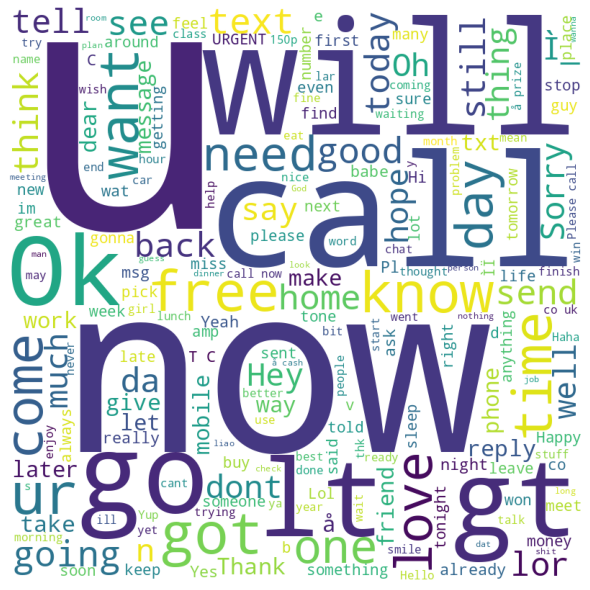

In [20]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(data_set['Data']))

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

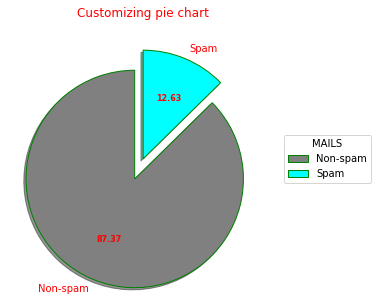

In [21]:
#pie chart
fig, ax = plt.subplots(figsize =(5, 5))
#labels
m=['Non-spam','Spam']
#title for chart
ax.set_title("Customizing pie chart",color="red")
# Creating color parameters
colors = ( "grey", "cyan")
# Creating explode data
explode = (0.2, 0.0)
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Creating plot
wedges, texts, autotexts = ax.pie(data_set['Variety'].value_counts(),
                                  autopct = "%0.2f",
                                  explode = explode,
                                  labels = m,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="red"))
# Adding legend
ax.legend(wedges,m,
          title ="MAILS",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")

plt.show()

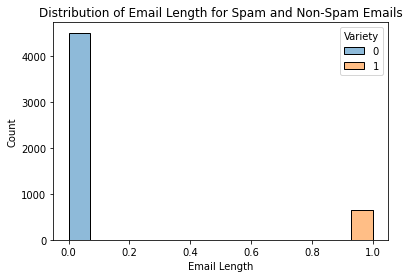

In [22]:
#Distribution plot
sea.histplot(data=data_set, x=data_set['Variety'], hue="Variety", multiple="stack", kde=True)
plt.xlabel('Email Length')
plt.ylabel('Count')
plt.title('Distribution of Email Length for Spam and Non-Spam Emails')
plt.show()

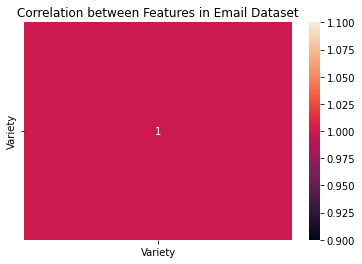

In [23]:
#Heatmap
sea.heatmap(data_set.corr(), annot=True)
plt.title('Correlation between Features in Email Dataset')
plt.show()

In [24]:
# Tokenize words
nltk.download('punkt')
data_set['words'] = data_set['Data'].apply(lambda x:len(nltk.word_tokenize(x)))
print(data_set.sample(8))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


      Variety                                               Data  words
4264        0   &lt;DECIMAL&gt; m but its not a common car he...     35
528         1  You will recieve your tone within the next 24h...     21
4569        1  Wanna have a laugh? Try CHIT-CHAT on your mobi...     37
1321        0  I wake up long ago already... Dunno, what othe...     13
3807        0              Mm you ask him to come its enough :-)     11
2244        0                            No management puzzeles.      4
1095        0                            Ryder unsold.now gibbs.      4
188         0  Have you got Xmas radio times. If not i will g...     14


<ipython-input-24-85f1dc38ef7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['words'] = data_set['Data'].apply(lambda x:len(nltk.word_tokenize(x)))


In [25]:
# Tokenize sentences
data_set['sentence'] = data_set['Data'].apply(lambda x:len(nltk.sent_tokenize(x)))
print(data_set.sample(8))

      Variety                                               Data  words  \
2710        1  Hope you enjoyed your new content. text stop t...     18   
2046        0                   Aight fuck it, I'll get it later      9   
5097        0  Sorry about that this is my mates phone and i ...     15   
1968        0  2 laptop... I noe infra but too slow lar... I ...     15   
2572        0  The house is on the water with a dock, a boat ...     25   
3080        0  Have a great trip to India. And bring the ligh...     32   
5120        1       PRIVATE! Your 2003 Account Statement for 078      8   
2029        0             Thanx but my birthday is over already.      8   

      sentence  
2710         3  
2046         1  
5097         1  
1968         3  
2572         1  
3080         4  
5120         2  
2029         1  


<ipython-input-25-97102b2dd681>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['sentence'] = data_set['Data'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [26]:
# Count number of characters in each text
data_set['chars']= data_set['Data'].apply(len)
print(data_set.sample(8))

      Variety                                               Data  words  \
3036        0   Cos darren say Ì_ considering mah so i ask Ì_...     11   
3336        0                 I AM AT THE GAS STATION. GO THERE.     10   
2339        0  Cheers for the message Zogtorius. IåÕve been s...     22   
4290        0                          Call me when u're done...      7   
4834        0  OH RITE. WELL IM WITH MY BEST MATE PETE, WHO I...     31   
4118        0  Hiya do u like the hlday pics looked horrible ...     27   
5101        0          Nope thats fine. I might have a nap tho!      11   
1653        0  I was at bugis juz now wat... But now i'm walk...     39   

      sentence  chars  
3036         1     48  
3336         2     34  
2339         2    108  
4290         1     25  
4834         3    121  
4118         3    116  
5101         2     41  
1653         3    147  


<ipython-input-26-328154d32112>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['chars']= data_set['Data'].apply(len)


In [27]:
# Statistics summary of Spam mails
print("Statistics summary of Spam mails")
print(data_set[data_set['Variety'] == 1][['words', 'sentence', 'chars']].describe())

Statistics summary of Spam mails
            words    sentence       chars
count  653.000000  653.000000  653.000000
mean    27.667688    2.970904  137.891271
std      7.008418    1.488425   30.137753
min      2.000000    1.000000   13.000000
25%     25.000000    2.000000  132.000000
50%     29.000000    3.000000  149.000000
75%     32.000000    4.000000  157.000000
max     46.000000    9.000000  224.000000


In [28]:
# Statistics summary of Non-Spam mails
print("Statistics summary of Non-Spam mails")
print(data_set[data_set['Variety'] == 0][['words', 'sentence', 'chars']].describe())

Statistics summary of Non-Spam mails
             words     sentence        chars
count  4516.000000  4516.000000  4516.000000
mean     17.123782     1.820195    70.459256
std      13.493970     1.383657    56.358207
min       1.000000     1.000000     2.000000
25%       8.000000     1.000000    34.000000
50%      13.000000     1.000000    52.000000
75%      22.000000     2.000000    90.000000
max     220.000000    38.000000   910.000000


In [29]:
#Removing stop words
nltk.download('stopwords')
stop = stopwords.words('english')

data_set['Data'] = data_set['Data'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_set['Data'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-29-df4e69fe540c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Data'] = data_set['Data'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


0    Go jurong point, crazy.. Available bugis n gre...
1                        Ok lar... Joking wif u oni...
2    Free entry 2 wkly comp win FA Cup final tkts 2...
3            U dun say early hor... U c already say...
4            Nah I think goes usf, lives around though
Name: Data, dtype: object

In [30]:
#Removing punctuations and lower casing
data_set['Data'] = data_set['Data'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
data_set['Data'] = data_set['Data'].apply(lambda x: x.lower())

#stemming of words
st = PorterStemmer()
data_set['Data'] = data_set['Data'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))
data_set.head()

<ipython-input-30-fd1b79ec1ada>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Data'] = data_set['Data'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
<ipython-input-30-fd1b79ec1ada>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Data'] = data_set['Data'].apply(lambda x: x.lower())
<ipython-input-30-fd1b79ec1ada>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Variety,Data,words,sentence,chars
0,0,go jurong point crazi avail bugi n great world...,24,2,111
1,0,ok lar joke wif u oni,8,2,29
2,1,free entri 2 wkli comp win fa cup final tkt 21...,37,2,155
3,0,u dun say earli hor u c alreadi say,13,1,49
4,0,nah i think goe usf live around though,15,1,61


In [31]:
#Vectorizing the Words
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(data_set['Data'])
X = features
y = data_set['Variety']

In [32]:
#Splitting the Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#Model Training
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
#prediction
prediction_on_training_data = knn.predict(X_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data*100)

Accuracy on training data :  91.58403869407496


In [35]:
#Model Training
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [43]:
#Prediction and Model Evaluation
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy*100)
print('Confusion matrix:\n', conf_matrix)
print('Classification report:\n', class_report)

Accuracy: 96.0348162475822
Confusion matrix:
 [[889   0]
 [ 41 104]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.72      0.84       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034

